# Analise das ações do Banco BMG BMGB4
24/03/2025

In [ ]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt


Carregando os dados

In [ ]:
ticker = yf.Ticker('BMGB4.SA')
df = ticker.history(period='5y')
df.index = df.index.date
# Renomeando as colunas
df.rename(columns={
    'Open': 'Abertura',
    'High': 'Máxima',
    'Low': 'Mínima',
    'Close': 'Fechamento',
    'Volume': 'Volume',
    'Dividends': 'Dividendos'
}, inplace=True)

#Tabela de dividendos
df_dividendos = df['Dividendos']

#Excluindo colunas
df.drop('Dividendos', axis=1, inplace=True)
df.drop('Stock Splits', axis=1, inplace=True)
df.head()

,Abertura,Máxima,Mínima,Fechamento,Volume
2020-03-24,2.402516,2.439572,2.229584,2.229584,1423600
2020-03-25,2.254288,2.458100,2.211055,2.408691,2798200
2020-03-26,2.390163,2.575447,2.377811,2.476629,2050600
2020-03-27,2.383987,2.501334,2.316050,2.414868,1695000
2020-03-30,2.414868,2.495157,2.303697,2.322226,1669700


<h1>Analise dos dividendos do Banco BMG</H1>

<p>Maior e menor dividendo</p>

In [ ]:
print(f'Menor valor pago R$ {df_dividendos[df_dividendos > 0].min()}')
print(f'Maior valor pago R$ {df_dividendos.max()}')

Menor valor pago R$ 0.02
Maior valor pago R$ 0.3356


<h2>Simulação de dividendos pagos para Mil ações</h2>

In [ ]:
print(f'Valor pago R$ {df_dividendos.max() * 1000}')

Valor pago R$ 335.6


<h2>Historico de Fechamento</h2>

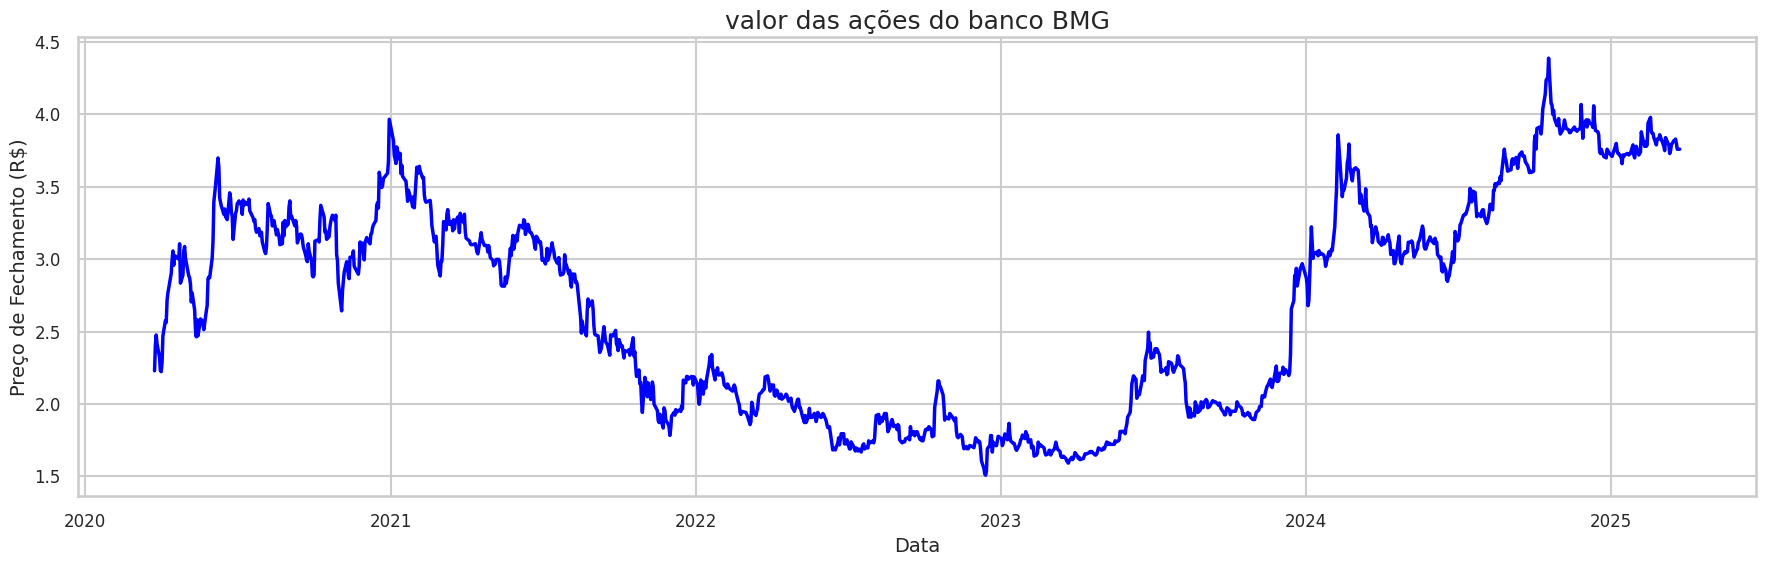

In [ ]:


sns.set(style='whitegrid', context='talk', palette='muted')

plt.figure(figsize=(18, 6))
sns.lineplot(data=df['Fechamento'], linewidth=2.5, color='blue')
plt.title('valor das ações do banco BMG')
plt.xlabel('Data', fontsize=14)
plt.ylabel('Preço de Fechamento (R$)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


<h2>Média movel de 90 dias</h2>

In [ ]:
mm = df['Mm'] = df['Fechamento'].rolling(window=120).mean()

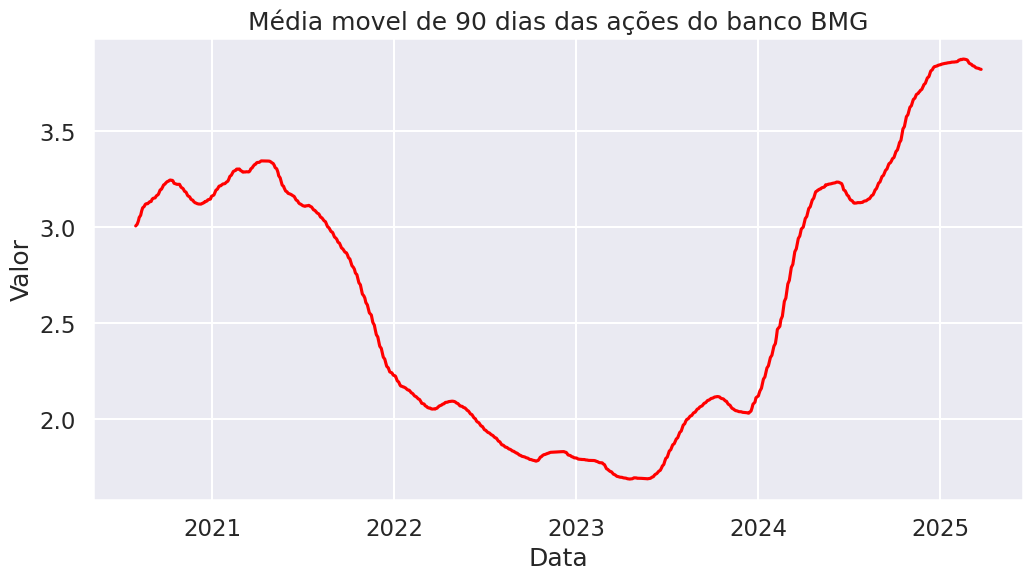

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(mm, color='red')
plt.title('Média movel de 90 dias das ações do banco BMG')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show();

<h2>Média movel de 120 dias</h2>

In [ ]:
df['Mm'] = df['Fechamento'].rolling(window=120).mean()


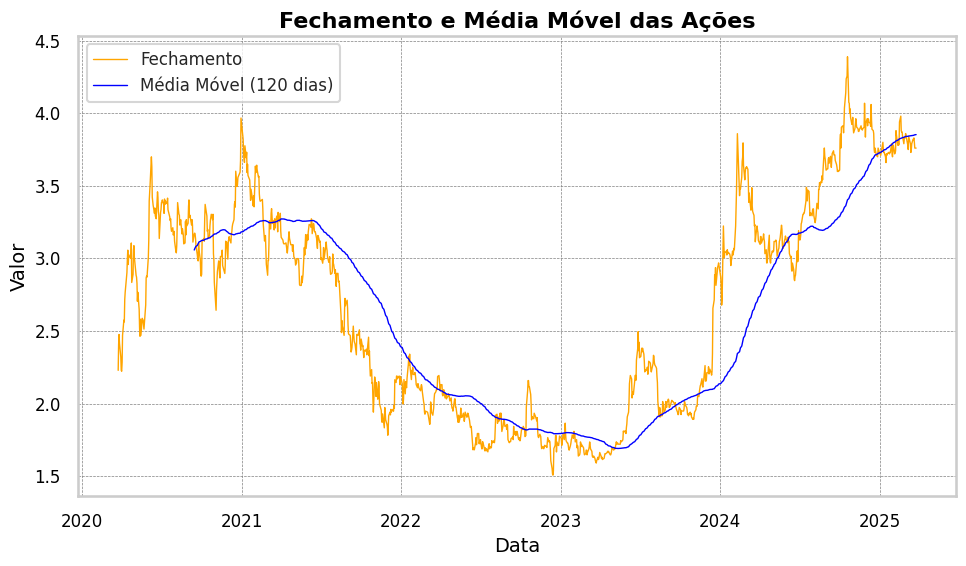

In [ ]:

sns.set(style='whitegrid', context='talk')

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Fechamento'], color='orange', linewidth=1, label='Fechamento')
plt.plot(df.index, df['Mm'], color='blue', linewidth=1,  label='Média Móvel (120 dias)')
plt.title('Fechamento e Média Móvel das Ações', fontsize=16, weight='bold', color='black')
plt.xlabel('Data', fontsize=14, color='black')
plt.ylabel('Valor', fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.legend(loc='upper left', fontsize=12)

plt.gca().set_facecolor('white')  # Fundo branco
plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Grade mais clara

# Exibe o gráfico
plt.tight_layout()
plt.show()


<h2>Simulando a valorização de 1000 ações</h2>

In [ ]:
df['Investimento'] = df['Fechamento'] * 1000

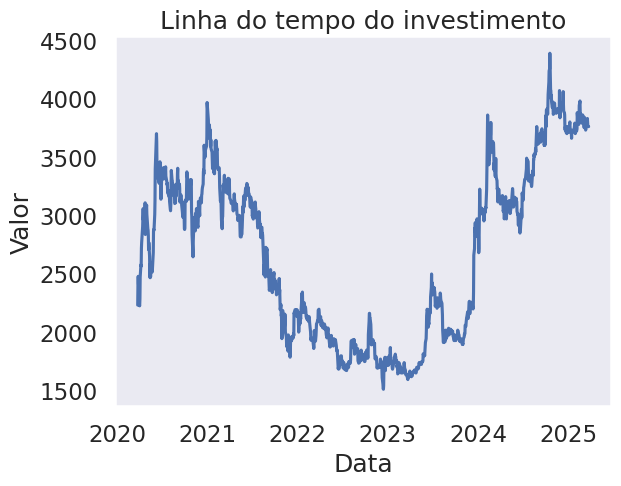

In [73]:
sns.set_style('dark')
sns.lineplot(df['Investimento'])
plt.title('Linha do tempo do investimento')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show();

<h2>Média movel semestral do investimento</h2>

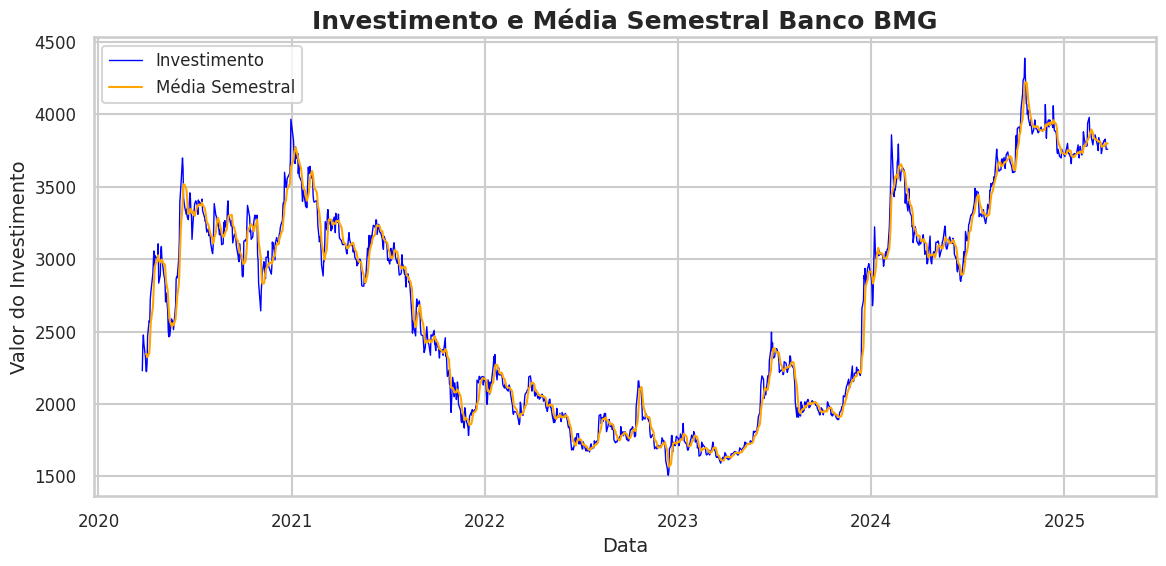

In [74]:

df['Média Semestral'] = df['Investimento'].rolling(window=6).mean()

sns.set(style='whitegrid', context='talk')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Investimento', color='blue', linewidth=1, label='Investimento')
sns.lineplot(data=df, x=df.index, y='Média Semestral', color='orange', linewidth=1.50, label='Média Semestral')

plt.title('Investimento e Média Semestral Banco BMG', fontsize=18, weight='bold')
plt.xlabel('Data', fontsize=14)
plt.ylabel('Valor do Investimento', fontsize=14)
plt.xticks( fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=12)

plt.tight_layout()

plt.show()


<h1>Indicadores quantitativos</h1

<table>
  <thead>
    <tr>
      <th>Indicador</th>
      <th>Valor</th>
      <th>Observações</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>ROI (Return on Investment)</td>
      <td>Informação não disponível na busca</td>
      <td>Necessário consultar relatórios financeiros específicos.</td>
    </tr>
    <tr>
      <td>P/L (Price to Earnings)</td>
      <td>8.6x (Investing.com) / 7.90 (InfoMoney)</td>
      <td>Variações podem ocorrer dependendo da fonte e data da informação.</td>
    </tr>
    <tr>
      <td>P/VP (Price to Book Value)</td>
      <td>0.50 (Investidor10) / 0.51 (Oceans14)</td>
      <td>Indica que o valor de mercado da ação está abaixo do valor patrimonial líquido por ação.</td>
    </tr>
    <tr>
      <td>Dividend Yield</td>
      <td>9.84% (Investidor10) / 9.50% (Oceans14)</td>
      <td>Representa o rendimento de dividendos em relação ao preço da ação.</td>
    </tr>
  </tbody>
</table>